In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Configurações
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("=" * 80)
print("FASE 5: ANÁLISE EXPLORATÓRIA (EDA)")
print("=" * 80)
print()

FASE 5: ANÁLISE EXPLORATÓRIA (EDA)



In [29]:
# CARREGAMENTO DE DADOS

products_ml = pd.read_parquet('../data/refined/products_features.parquet')
customers_ml = pd.read_parquet('../data/refined/customers_features.parquet')
sales = pd.read_parquet('../data/trusted/sales_trusted.parquet')

# Converter datas
sales['sale_date'] = pd.to_datetime(sales['sale_date'])

print("\n DADOS CARREGADOS:")
print(f"  Produtos: {len(products_ml):,} registros × {len(products_ml.columns)} colunas")
print(f"  Clientes: {len(customers_ml):,} registros × {len(customers_ml.columns)} colunas")
print(f"  Vendas: {len(sales):,} registros × {len(sales.columns)} colunas")

# Verificar tipos
print(f"\n PERÍODO DE VENDAS:")
print(f"  De: {sales['sale_date'].min().date()}")
print(f"  Até: {sales['sale_date'].max().date()}")
print(f"  Dias: {(sales['sale_date'].max() - sales['sale_date'].min()).days}")


 DADOS CARREGADOS:
  Produtos: 10,000 registros × 22 colunas
  Clientes: 5,000 registros × 18 colunas
  Vendas: 120,000 registros × 14 colunas

 PERÍODO DE VENDAS:
  De: 2023-01-01
  Até: 2025-12-31
  Dias: 1095



SEÇÃO 1: ANÁLISE DE PRODUTOS

1.1 DISTRIBUIÇÃO DE TIPOS DE ROLAMENTOS
bearing_type
Autocompensador    2047
Agujas             2032
Esférico           2006
Contato Angular    1976
Cilíndrico         1939
Name: count, dtype: int64


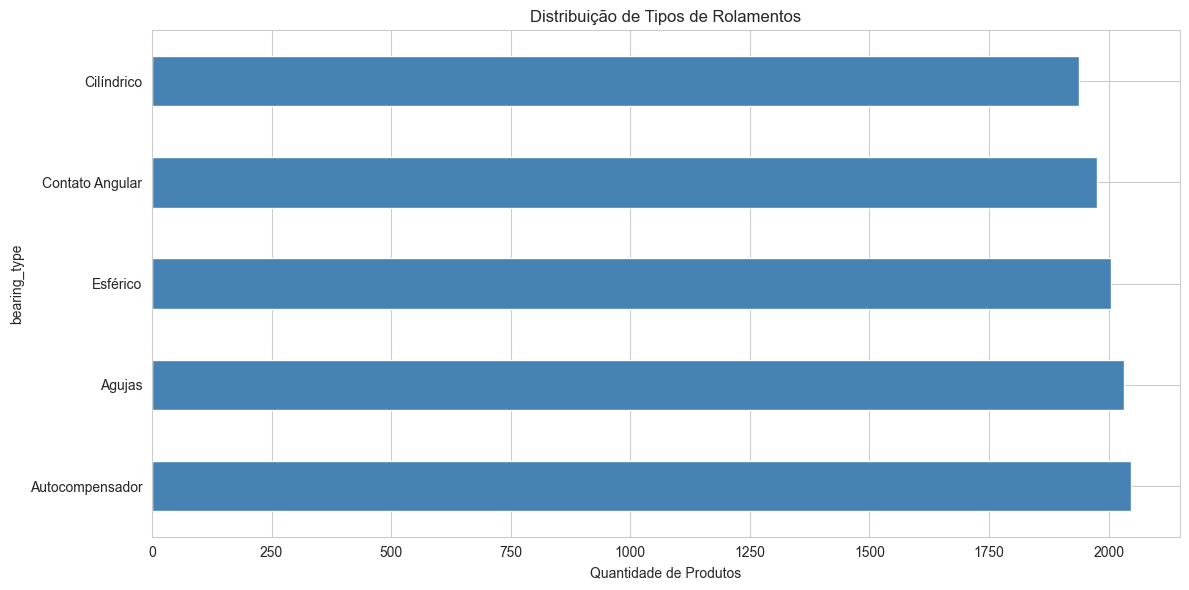


1.2 DISTRIBUIÇÃO DE MATERIAIS
material
Cerâmica          3373
Aço               3333
Aço Inoxidável    3294
Name: count, dtype: int64


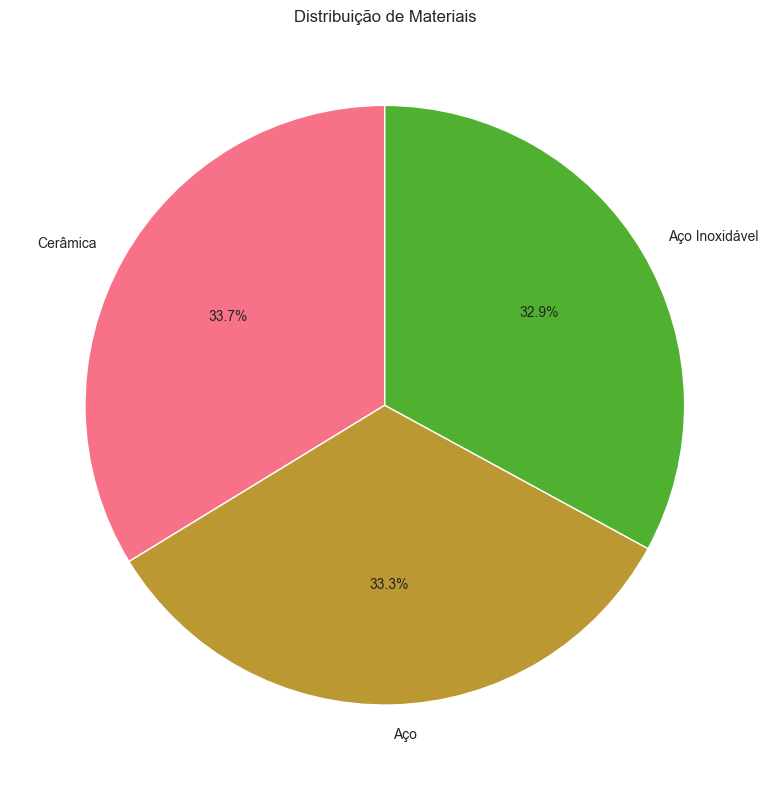


1.3 CAPACIDADE DE CARGA (N)
count    10000.000000
mean     25027.980201
std      14269.792306
min        502.970000
25%      12528.092500
50%      25103.195000
75%      37350.120000
max      49999.890000
Name: load_capacity, dtype: float64


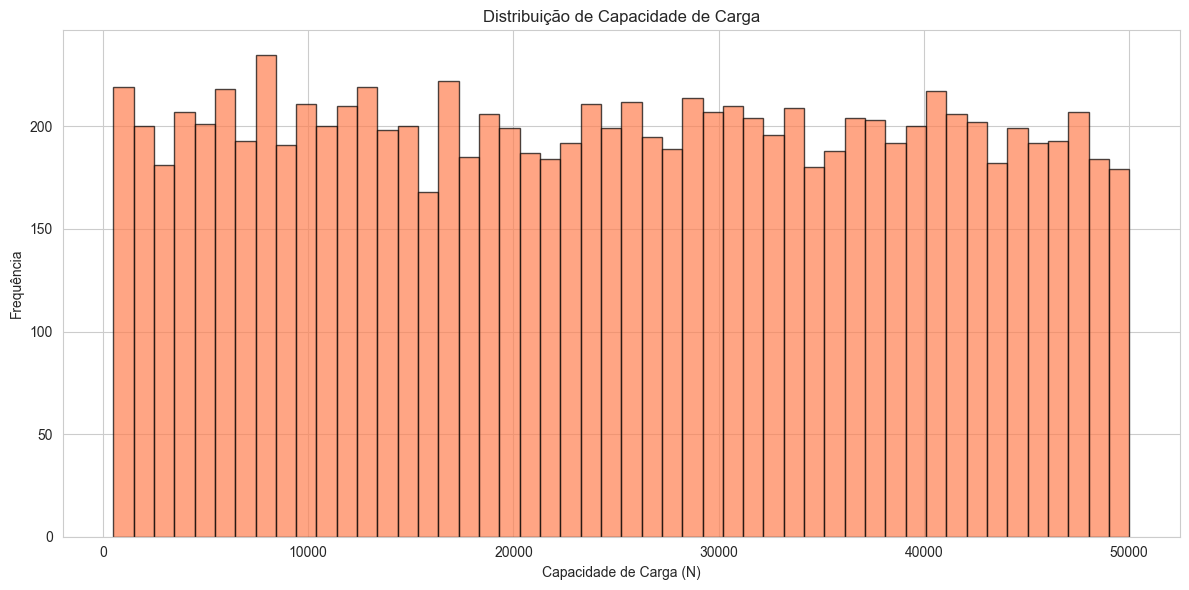


1.4 VELOCIDADE MÁXIMA (RPM)
count    10000.000000
mean      8052.276600
std       4030.789558
min       1008.000000
25%       4566.500000
50%       8059.500000
75%      11553.000000
max      14998.000000
Name: max_speed, dtype: float64


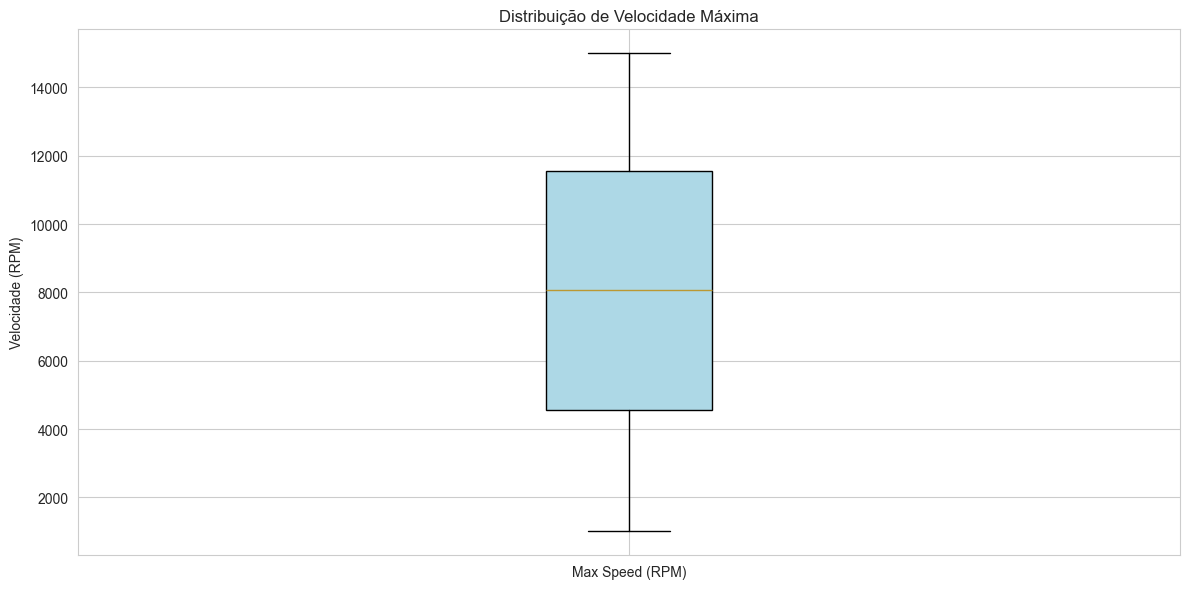

In [30]:
## ANÁLISE DE PRODUTOS (PARTE 1)
print("\n" + "=" * 80)
print("SEÇÃO 1: ANÁLISE DE PRODUTOS")
print("=" * 80)

# ===== 1.1 Distribuição de Tipos de Rolamentos =====
print("\n1.1 DISTRIBUIÇÃO DE TIPOS DE ROLAMENTOS")
bearing_counts = products_ml['bearing_type'].value_counts()
print(bearing_counts)

fig, ax = plt.subplots(figsize=(12, 6))
bearing_counts.plot(kind='barh', ax=ax, color='steelblue')
ax.set_xlabel('Quantidade de Produtos')
ax.set_title('Distribuição de Tipos de Rolamentos')
plt.tight_layout()
plt.show()

# ===== 1.2 Distribuição de Materiais =====
print("\n1.2 DISTRIBUIÇÃO DE MATERIAIS")
materials = products_ml['material'].value_counts()
print(materials)

fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(materials, labels=materials.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribuição de Materiais')
plt.tight_layout()
plt.show()

# ===== 1.3 Capacidade de Carga =====
print("\n1.3 CAPACIDADE DE CARGA (N)")
print(products_ml['load_capacity'].describe())

fig, ax = plt.subplots(figsize=(12, 6))
products_ml['load_capacity'].hist(bins=50, ax=ax, color='coral', edgecolor='black', alpha=0.7)
ax.set_xlabel('Capacidade de Carga (N)')
ax.set_ylabel('Frequência')
ax.set_title('Distribuição de Capacidade de Carga')
plt.tight_layout()
plt.show()

# ===== 1.4 Velocidade Máxima =====
print("\n1.4 VELOCIDADE MÁXIMA (RPM)")
print(products_ml['max_speed'].describe())

fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot([products_ml['max_speed']], labels=['Max Speed (RPM)'], patch_artist=True)
for box in bp['boxes']:
    box.set_facecolor('lightblue')
ax.set_ylabel('Velocidade (RPM)')
ax.set_title('Distribuição de Velocidade Máxima')
plt.tight_layout()
plt.show()


1.6 PROBLEMAS TÉCNICOS (Features Binárias)
Colunas problem_*:


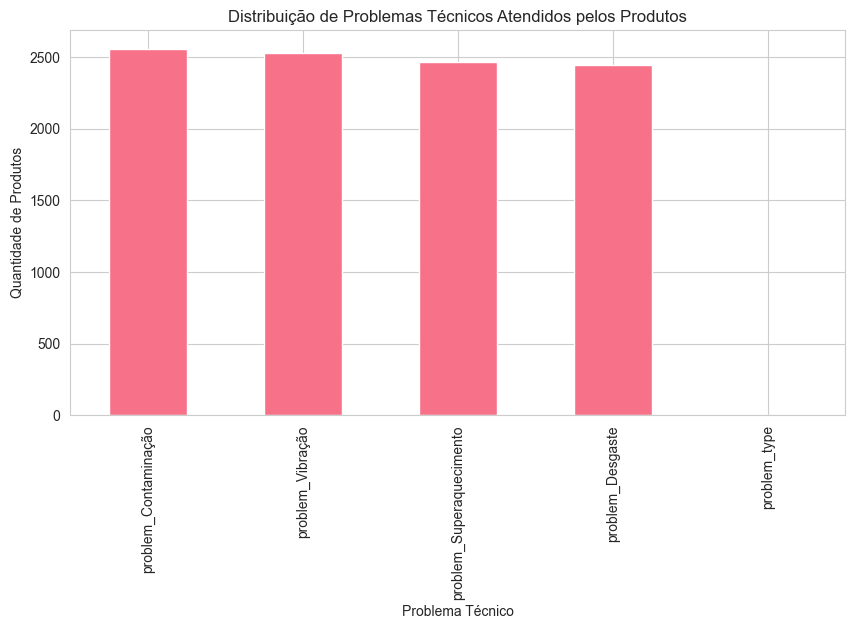

In [32]:
print("\n1.6 PROBLEMAS TÉCNICOS (Features Binárias)")

print("Colunas problem_*:")
problem_cols = [c for c in products_ml.columns if c.startswith("problem_")]
problem_data = (
    products_ml[problem_cols]
    .apply(pd.to_numeric, errors="coerce")
    .fillna(0)
    .astype(int)
)
problem_counts = problem_data.sum().sort_values(ascending=False)

problem_counts.plot(
    kind="bar",
    title="Distribuição de Problemas Técnicos Atendidos pelos Produtos",
    figsize=(10,5)
)

plt.ylabel("Quantidade de Produtos")
plt.xlabel("Problema Técnico")
plt.show()



1.5️ ANÁLISE DE PREÇOS
Custo Unitário - Min: R$50.03, Max: R$499.95, Média: R$274.51
Preço de Lista - Min: R$200.30, Max: R$2999.97, Média: R$1592.05

Margem de Lucro - Min: 0.3%, Max: 5725.8%, Média: 720.0%


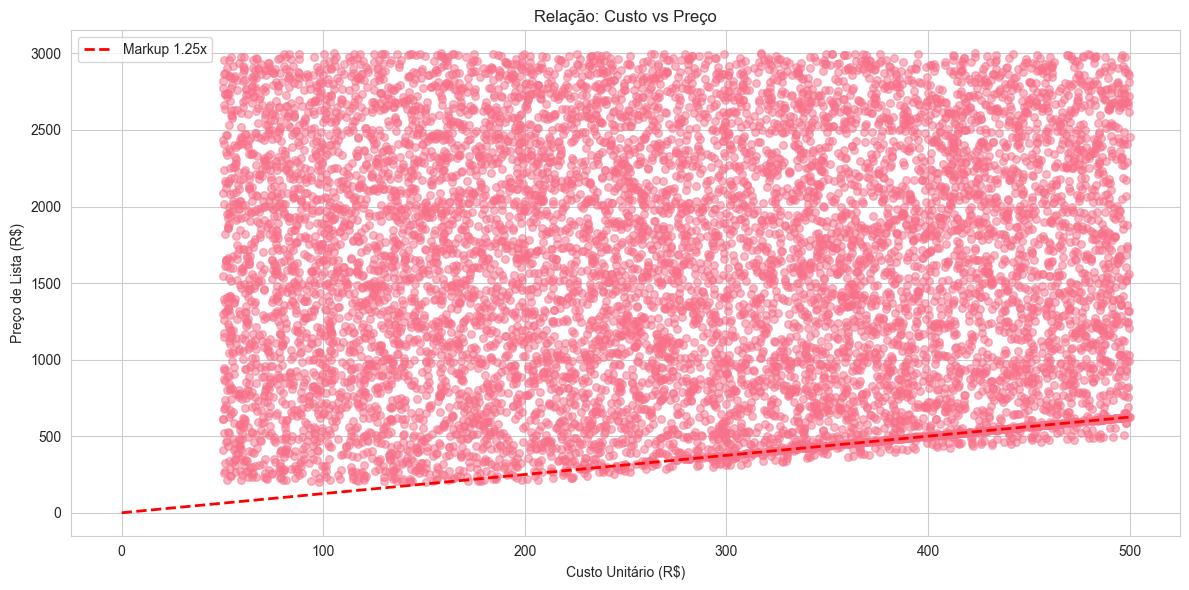


1.6 PROBLEMAS TÉCNICOS (Features Binárias)
Colunas problem_*:


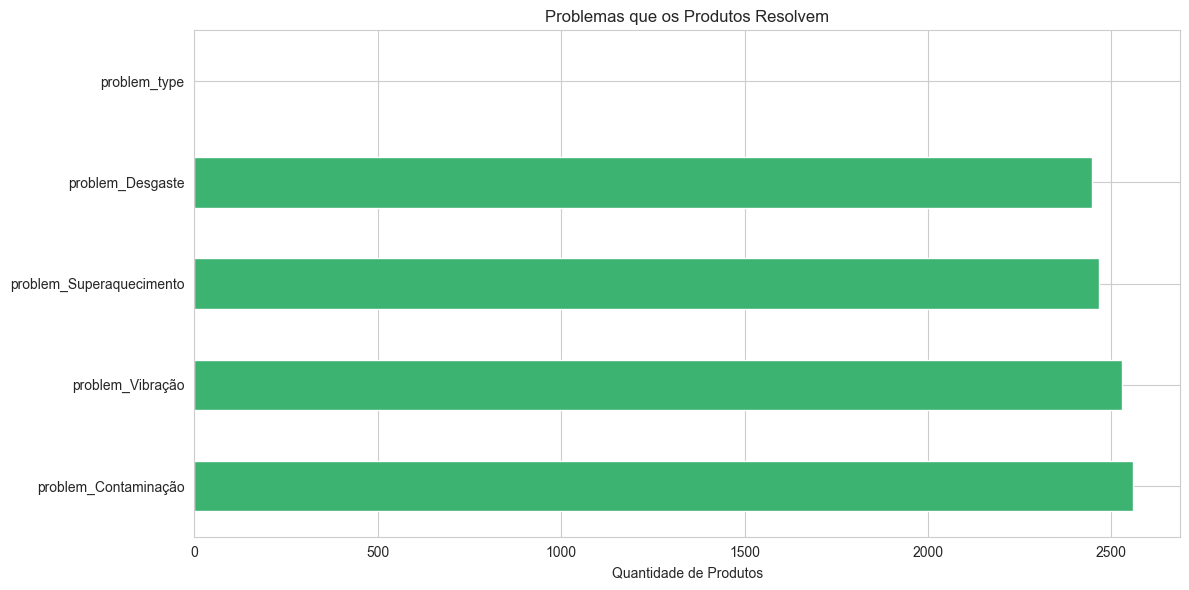


1.7️ CORRELAÇÃO ENTRE ATRIBUTOS TÉCNICOS
                   load_capacity  max_speed  temperature_limit  unit_cost  \
load_capacity           1.000000  -0.013573          -0.002406  -0.000490   
max_speed              -0.013573   1.000000           0.013527  -0.011267   
temperature_limit      -0.002406   0.013527           1.000000  -0.008799   
unit_cost              -0.000490  -0.011267          -0.008799   1.000000   
list_price             -0.010572   0.009194          -0.015347   0.002066   

                   list_price  
load_capacity       -0.010572  
max_speed            0.009194  
temperature_limit   -0.015347  
unit_cost            0.002066  
list_price           1.000000  


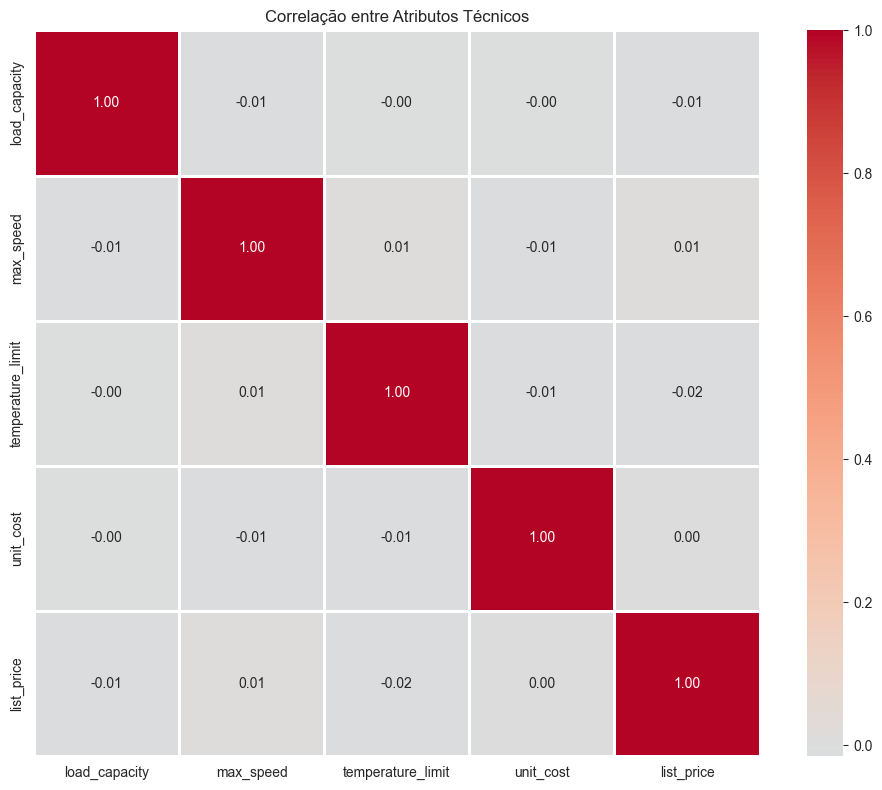

In [33]:
## ANÁLISE DE PRODUTOS (PARTE 2)

# ===== 1.5 Análise de Preços =====
print("\n1.5️ ANÁLISE DE PREÇOS")
print(f"Custo Unitário - Min: R${products_ml['unit_cost'].min():.2f}, "
      f"Max: R${products_ml['unit_cost'].max():.2f}, "
      f"Média: R${products_ml['unit_cost'].mean():.2f}")
print(f"Preço de Lista - Min: R${products_ml['list_price'].min():.2f}, "
      f"Max: R${products_ml['list_price'].max():.2f}, "
      f"Média: R${products_ml['list_price'].mean():.2f}")

# Margem de lucro
products_ml['profit_margin'] = (
    (products_ml['list_price'] - products_ml['unit_cost']) / 
    products_ml['unit_cost'] * 100
)
print(f"\nMargem de Lucro - Min: {products_ml['profit_margin'].min():.1f}%, "
      f"Max: {products_ml['profit_margin'].max():.1f}%, "
      f"Média: {products_ml['profit_margin'].mean():.1f}%")

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(products_ml['unit_cost'], products_ml['list_price'], alpha=0.5, s=30)
max_cost = products_ml['unit_cost'].max()
ax.plot([0, max_cost], [0, max_cost*1.25], 'r--', label='Markup 1.25x', linewidth=2)
ax.set_xlabel('Custo Unitário (R$)')
ax.set_ylabel('Preço de Lista (R$)')
ax.set_title('Relação: Custo vs Preço')
ax.legend()
plt.tight_layout()
plt.show()

# ===== 1.6 Problemas Técnicos por Produto =====
print("\n1.6 PROBLEMAS TÉCNICOS (Features Binárias)")

print("Colunas problem_*:")
problem_cols = [c for c in products_ml.columns if c.startswith("problem_")]
problem_cols


fig, ax = plt.subplots(figsize=(12, 6))
problem_counts.plot(kind='barh', ax=ax, color='mediumseagreen')
ax.set_xlabel('Quantidade de Produtos')
ax.set_title('Problemas que os Produtos Resolvem')
plt.tight_layout()
plt.show()

# ===== 1.7 Correlação entre Atributos Técnicos =====
print("\n1.7️ CORRELAÇÃO ENTRE ATRIBUTOS TÉCNICOS")
technical_cols = ['load_capacity', 'max_speed', 'temperature_limit', 
                 'unit_cost', 'list_price']
corr_matrix = products_ml[technical_cols].corr()
print(corr_matrix)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=ax, square=True, linewidths=1)
ax.set_title('Correlação entre Atributos Técnicos')
plt.tight_layout()
plt.show()



SEÇÃO 2: ANÁLISE DE CLIENTES

2.1️ DISTRIBUIÇÃO POR INDÚSTRIA
industry
Siderurgia          669
Alimentos           641
Mineração           629
Energia             619
Papel e Celulose    619
Química             614
Automotiva          613
Cimento             596
Name: count, dtype: int64


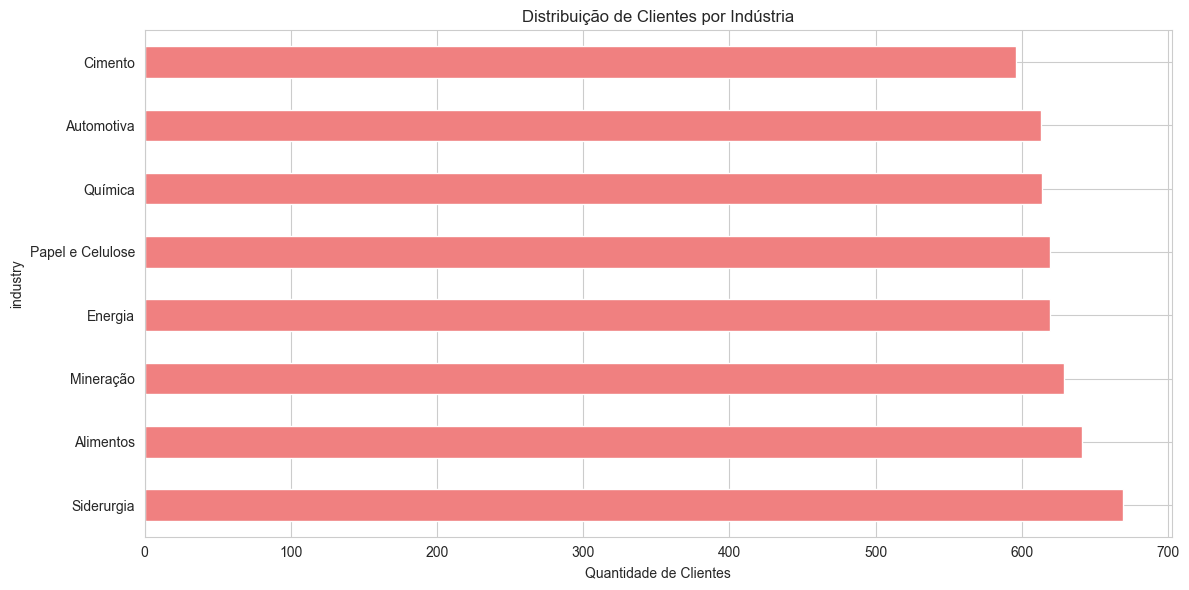


2.2️ TAMANHO DAS EMPRESAS
company_size
Pequena    1697
Grande     1674
Média      1629
Name: count, dtype: int64


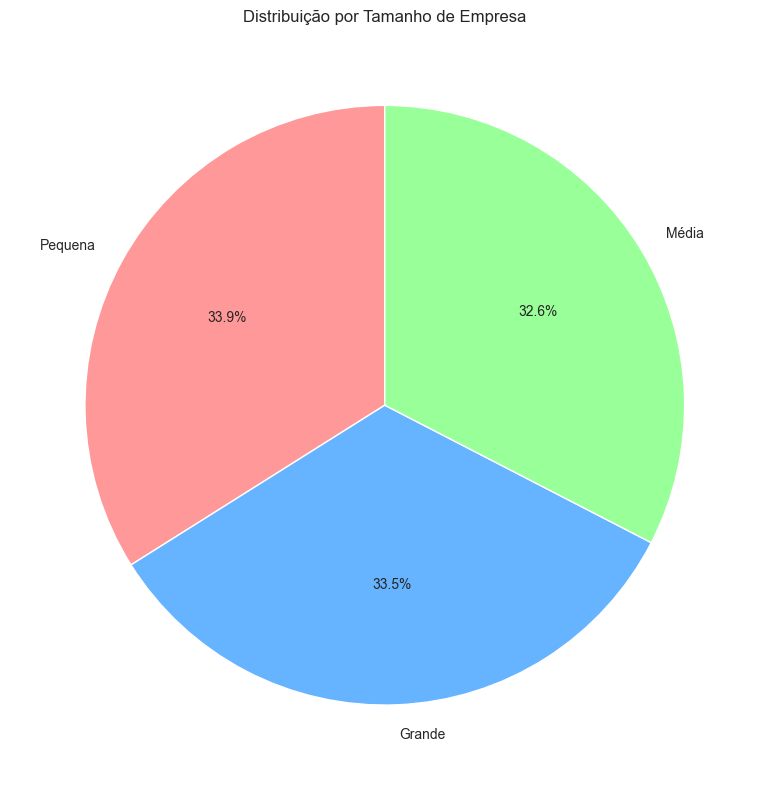


2.3️ MODELO DE MANUTENÇÃO PREFERIDO
maintenance_model
Terceirizada    1703
Mista           1649
Interna         1648
Name: count, dtype: int64


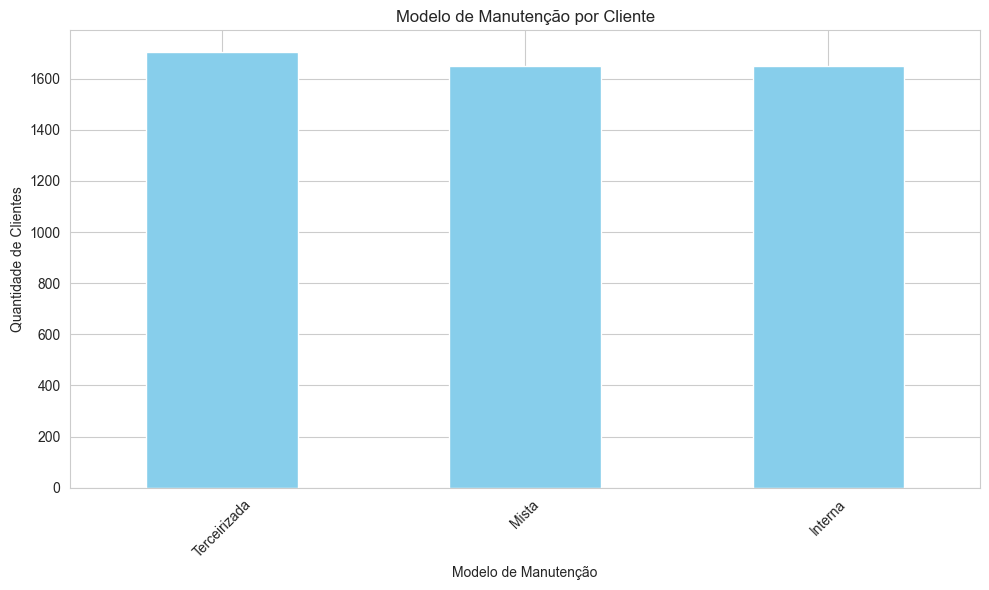


2.4️ CRITICALIDADE DO EQUIPAMENTO
equipment_criticality
Alta     1730
Baixa    1652
Média    1618
Name: count, dtype: int64


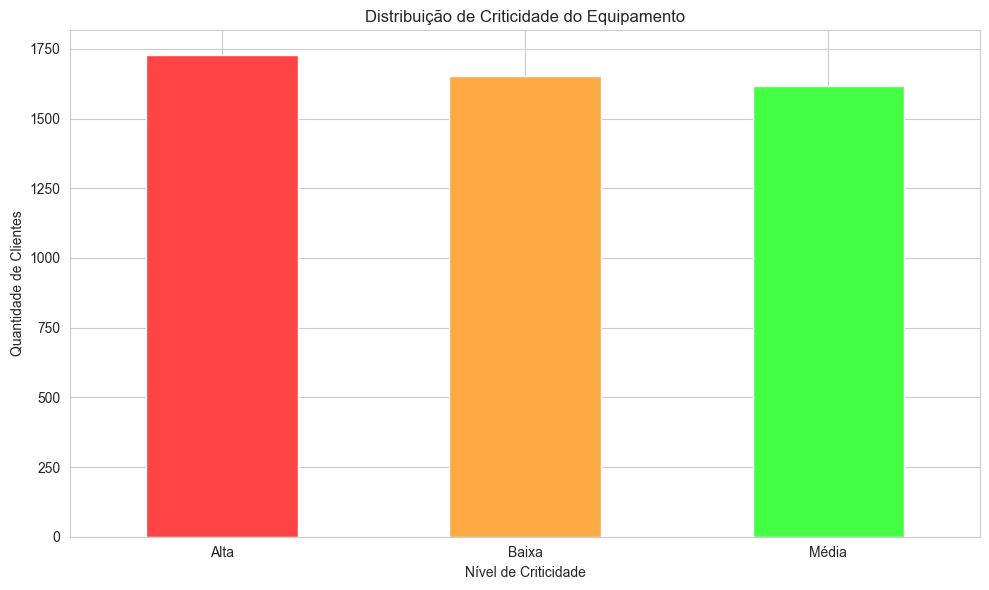

In [34]:
## ANÁLISE DE CLIENTES (PARTE 1)

print("\n" + "=" * 80)
print("SEÇÃO 2: ANÁLISE DE CLIENTES")
print("=" * 80)

# ===== 2.1 Distribuição por Indústria =====
print("\n2.1️ DISTRIBUIÇÃO POR INDÚSTRIA")
industry_counts = customers_ml['industry'].value_counts()
print(industry_counts)

fig, ax = plt.subplots(figsize=(12, 6))
industry_counts.plot(kind='barh', ax=ax, color='lightcoral')
ax.set_xlabel('Quantidade de Clientes')
ax.set_title('Distribuição de Clientes por Indústria')
plt.tight_layout()
plt.show()

# ===== 2.2 Tamanho das Empresas =====
print("\n2.2️ TAMANHO DAS EMPRESAS")
size_counts = customers_ml['company_size'].value_counts()
print(size_counts)

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
ax.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', 
       colors=colors, startangle=90)
ax.set_title('Distribuição por Tamanho de Empresa')
plt.tight_layout()
plt.show()

# ===== 2.3 Modelo de Manutenção =====
print("\n2.3️ MODELO DE MANUTENÇÃO PREFERIDO")
maintenance = customers_ml['maintenance_model'].value_counts()
print(maintenance)

fig, ax = plt.subplots(figsize=(10, 6))
maintenance.plot(kind='bar', ax=ax, color='skyblue')
ax.set_xlabel('Modelo de Manutenção')
ax.set_ylabel('Quantidade de Clientes')
ax.set_title('Modelo de Manutenção por Cliente')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# ===== 2.4 Criticalidade do Equipamento =====
print("\n2.4️ CRITICALIDADE DO EQUIPAMENTO")
criticality = customers_ml['equipment_criticality'].value_counts()
print(criticality)

fig, ax = plt.subplots(figsize=(10, 6))
criticality.plot(kind='bar', ax=ax, color=['#ff4444', '#ffaa44', '#44ff44'])
ax.set_xlabel('Nível de Criticidade')
ax.set_ylabel('Quantidade de Clientes')
ax.set_title('Distribuição de Criticidade do Equipamento')
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()


2.5️ RECEITA ANUAL ESTIMADA
count    5.000000e+03
mean     2.480103e+09
std      1.444791e+09
min      6.388021e+06
25%      1.222531e+09
50%      2.449601e+09
75%      3.759988e+09
max      4.997396e+09
Name: annual_revenue_estimated, dtype: float64


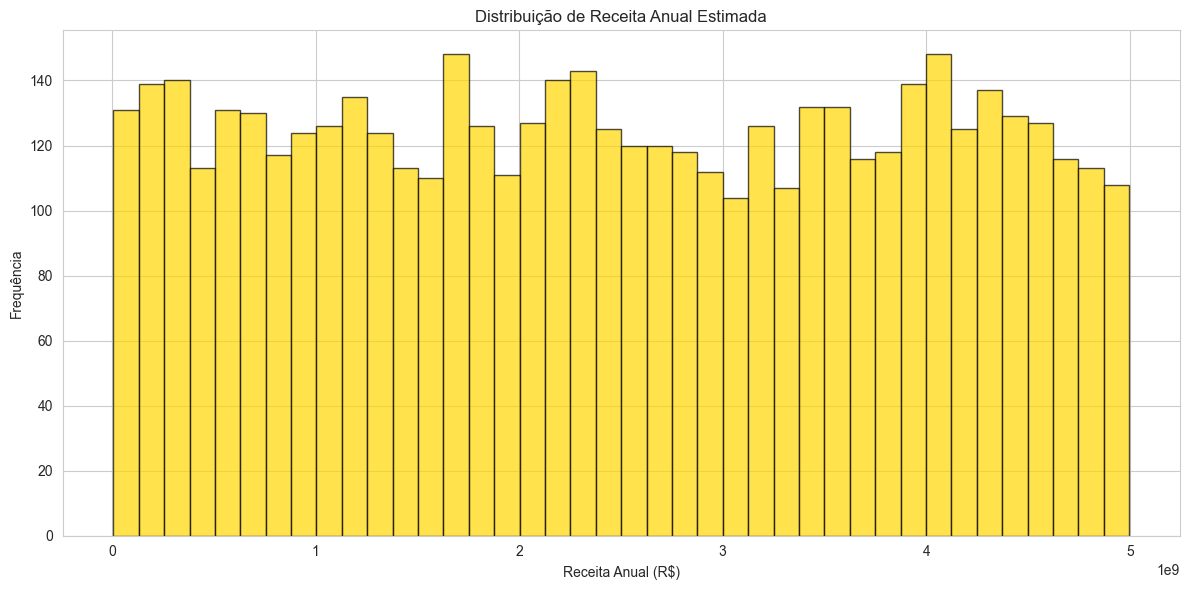


2.6️ ORÇAMENTO ANUAL DE MANUTENÇÃO
count    5.000000e+03
mean     2.528332e+06
std      1.421249e+06
min      5.018842e+04
25%      1.293403e+06
50%      2.521822e+06
75%      3.737595e+06
max      4.999970e+06
Name: maintenance_budget_annual, dtype: float64


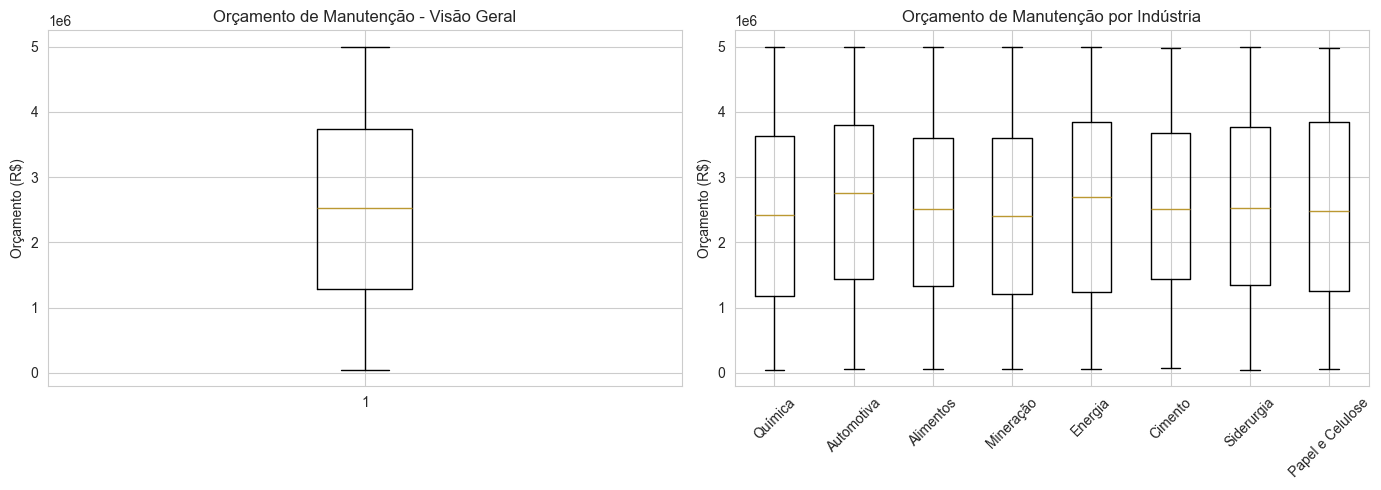


2.7️ CUSTO DE DOWNTIME POR CRITICIDADE DO EQUIPAMENTO


,mean,median,count
equipment_criticality,,,
Baixa,25655.082240,25814.685,1652
Alta,25706.970139,25383.960,1730
Média,25803.806650,25772.860,1618


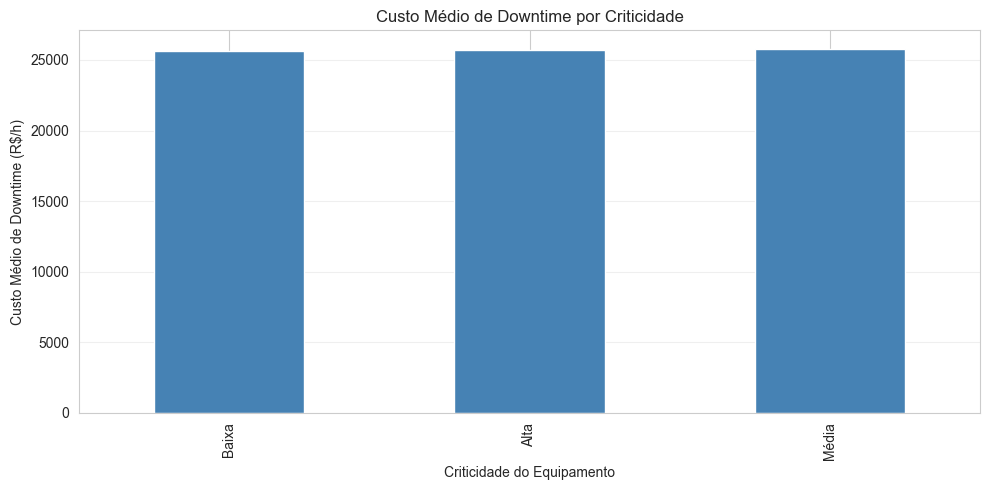


2.8️ PROBLEMAS ESPERADOS POR INDÚSTRIA (NORMALIZADO)


,problem_contaminacao,problem_desgaste,problem_superaquecimento,problem_vibracao
industry,,,,
Alimentos,1.0,1.0,0.0,0.0
Automotiva,0.0,0.0,1.0,1.0
Cimento,0.0,1.0,0.0,1.0
Energia,0.0,0.0,1.0,1.0
Mineração,0.0,1.0,0.0,1.0
Papel e Celulose,1.0,1.0,0.0,0.0
Química,1.0,0.0,1.0,0.0
Siderurgia,0.0,0.0,1.0,1.0


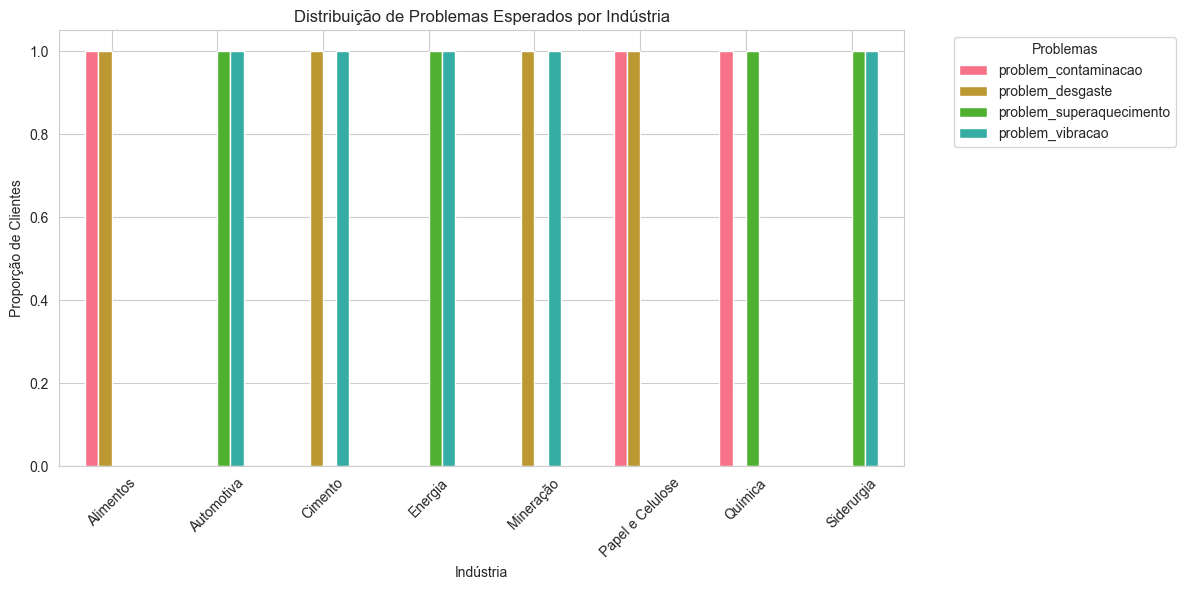

In [35]:
## ANÁLISE DE CLIENTES (PARTE 2)

# ===== 2.5 Receita Estimada =====
print("\n2.5️ RECEITA ANUAL ESTIMADA")
print(customers_ml['annual_revenue_estimated'].describe())

fig, ax = plt.subplots(figsize=(12, 6))
customers_ml['annual_revenue_estimated'].hist(bins=40, ax=ax, color='gold', edgecolor='black', alpha=0.7)
ax.set_xlabel('Receita Anual (R$)')
ax.set_ylabel('Frequência')
ax.set_title('Distribuição de Receita Anual Estimada')
plt.tight_layout()
plt.show()

# ===== 2.6 Orçamento de Manutenção =====
print("\n2.6️ ORÇAMENTO ANUAL DE MANUTENÇÃO")
print(customers_ml['maintenance_budget_annual'].describe())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Box plot geral
ax1.boxplot(customers_ml['maintenance_budget_annual'])
ax1.set_ylabel('Orçamento (R$)')
ax1.set_title('Orçamento de Manutenção - Visão Geral')

# Box plot por indústria
industries = customers_ml['industry'].unique()
budget_by_industry = [customers_ml[customers_ml['industry']==ind]['maintenance_budget_annual'].values 
                      for ind in industries]
ax2.boxplot(budget_by_industry, labels=industries)
ax2.set_ylabel('Orçamento (R$)')
ax2.set_title('Orçamento de Manutenção por Indústria')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ===== 2.7 Custo de Downtime por Criticidade =====

print("\n2.7️ CUSTO DE DOWNTIME POR CRITICIDADE DO EQUIPAMENTO")
grouped = (
    customers_ml
    .groupby('equipment_criticality')['downtime_cost_per_hour']
    .agg(['mean', 'median', 'count'])
    .sort_values('mean')
)
display(grouped)

fig, ax = plt.subplots(figsize=(10, 5))
grouped['mean'].plot(
    kind='bar',
    ax=ax,
    color='steelblue'
)
ax.set_xlabel('Criticidade do Equipamento')
ax.set_ylabel('Custo Médio de Downtime (R$/h)')
ax.set_title('Custo Médio de Downtime por Criticidade')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# ===== 2.8 Problemas Esperados por Indústria (Normalizado) =====

print("\n2.8️ PROBLEMAS ESPERADOS POR INDÚSTRIA (NORMALIZADO)")

problem_cols = [c for c in customers_ml.columns if c.startswith('problem_')]

problem_by_industry = (
    customers_ml
    .groupby('industry')[problem_cols]
    .mean()  # percentual de clientes com aquele problema
)
display(problem_by_industry)

fig, ax = plt.subplots(figsize=(12, 6))
problem_by_industry.plot(
    kind='bar',
    ax=ax
)
ax.set_xlabel('Indústria')
ax.set_ylabel('Proporção de Clientes')
ax.set_title('Distribuição de Problemas Esperados por Indústria')
ax.legend(title='Problemas', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



SEÇÃO 3: ANÁLISE DE VENDAS

3.1️ SÉRIE TEMPORAL DE VENDAS
Total de vendas: R$ 3,805,328,104.80
Média diária: R$ 3,472,014.69
Máximo diário: R$ 4,968,266.84


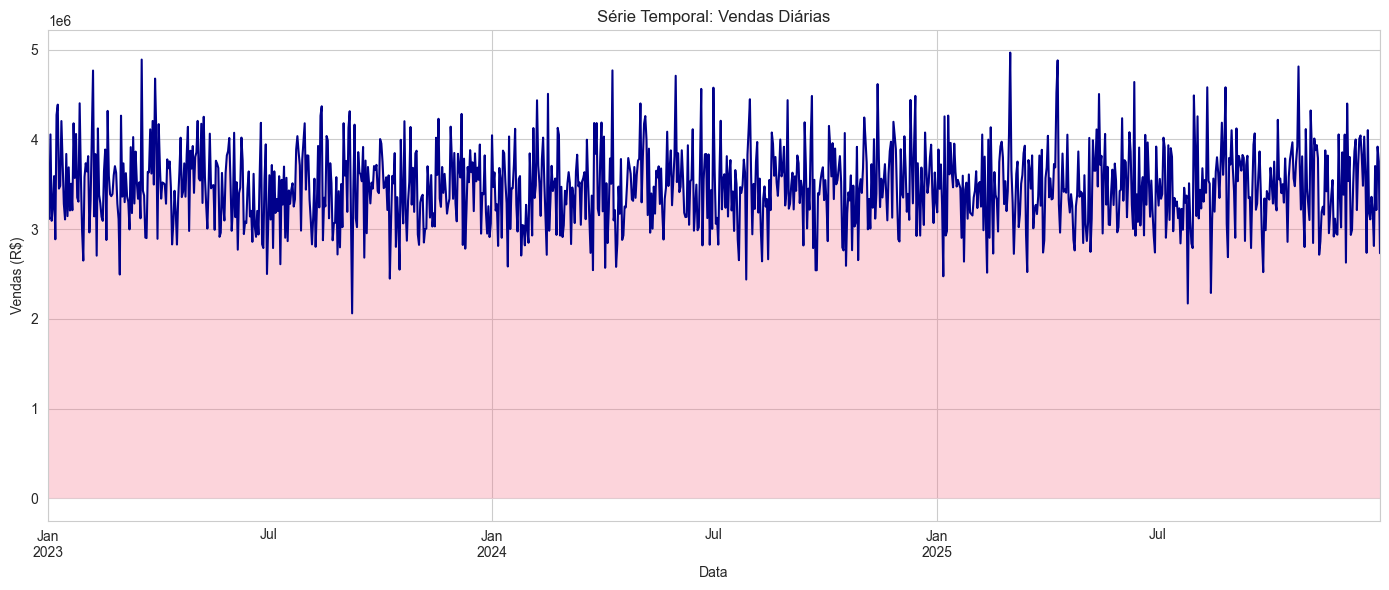


3.2️ TOTAL DE VENDAS POR CANAL
sales_channel
Representative    1.270663e+09
Distributor       1.269266e+09
Direct            1.265399e+09
Name: total_price, dtype: float64


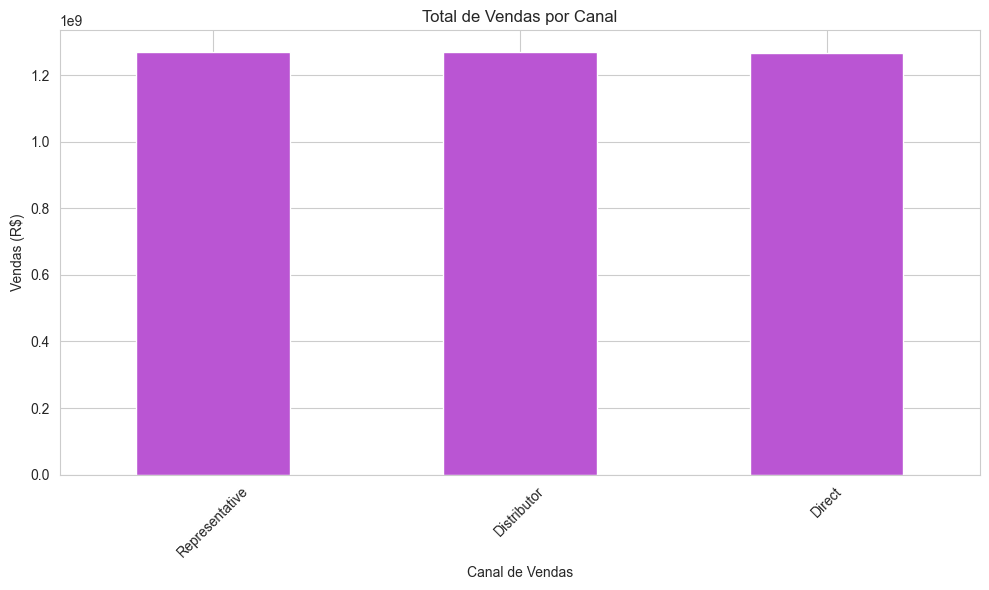


3.3️ TOP 20 PRODUTOS MAIS VENDIDOS (POR QUANTIDADE)
            quantity  total_price
product_id                       
P02316           653   1184349.69
P05975           607    358258.00
P07507           602   1695398.73
P09099           585   1491560.10
P04660           578   1567323.35
P05457           571   1605572.38
P03535           564   1164534.93
P06100           558   1646033.20
P06742           557   1063528.89
P06146           553   1148581.63
P05260           550    246483.61
P02209           542    991437.84
P09798           536    196844.41
P08269           532    333245.01
P01202           528   1433962.45
P01515           526    576005.17
P01898           524    371936.26
P05064           523    535623.18
P04748           522    176695.60
P09553           522   1522700.02


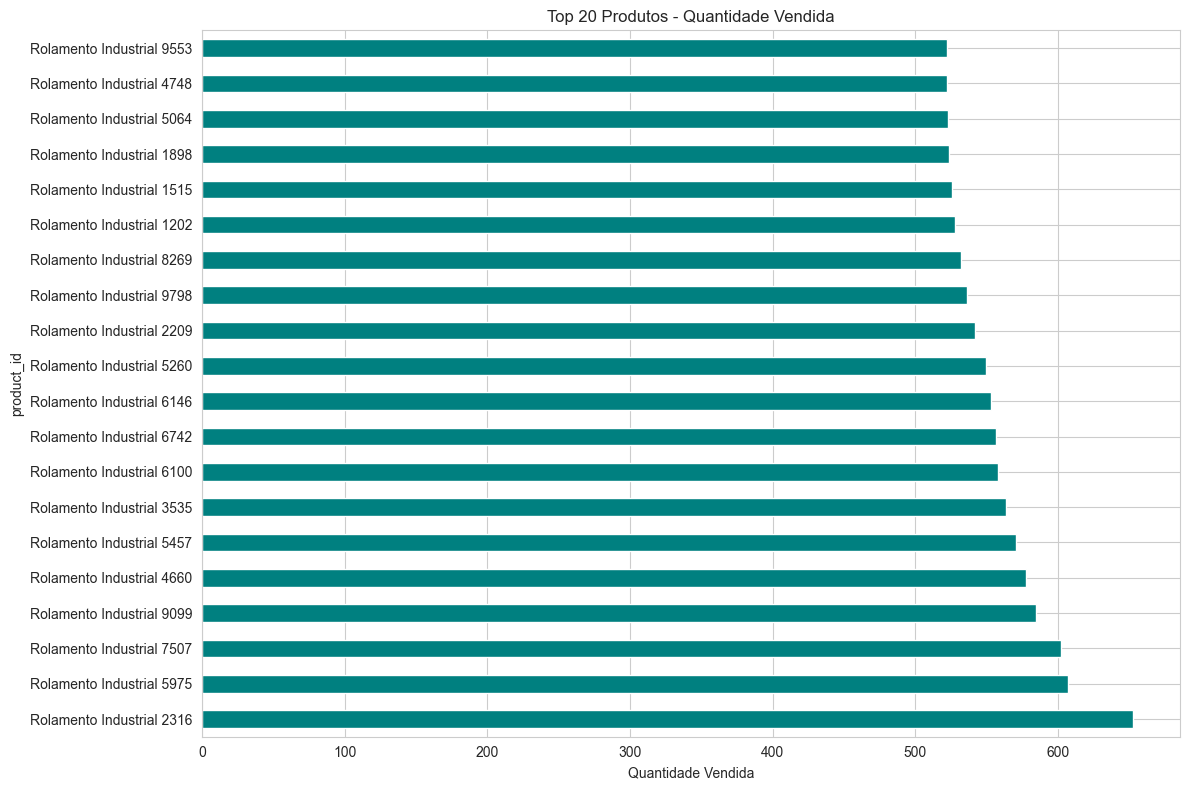


3.4️ TOP 20 CLIENTES (POR RECEITA)
customer_id
C00657    1839521.09
C00985    1685415.66
C01962    1546904.03
C02897    1522470.27
C02061    1518842.73
C02329    1502106.67
C04215    1477929.05
C04496    1468804.02
C03183    1456807.46
C01089    1452236.91
C01240    1447635.46
C00125    1441027.88
C01671    1417873.99
C04174    1410258.58
C02681    1409345.90
C00574    1399035.03
C03100    1387102.58
C00196    1385148.60
C04744    1380750.67
C03076    1371186.89
Name: total_price, dtype: float64


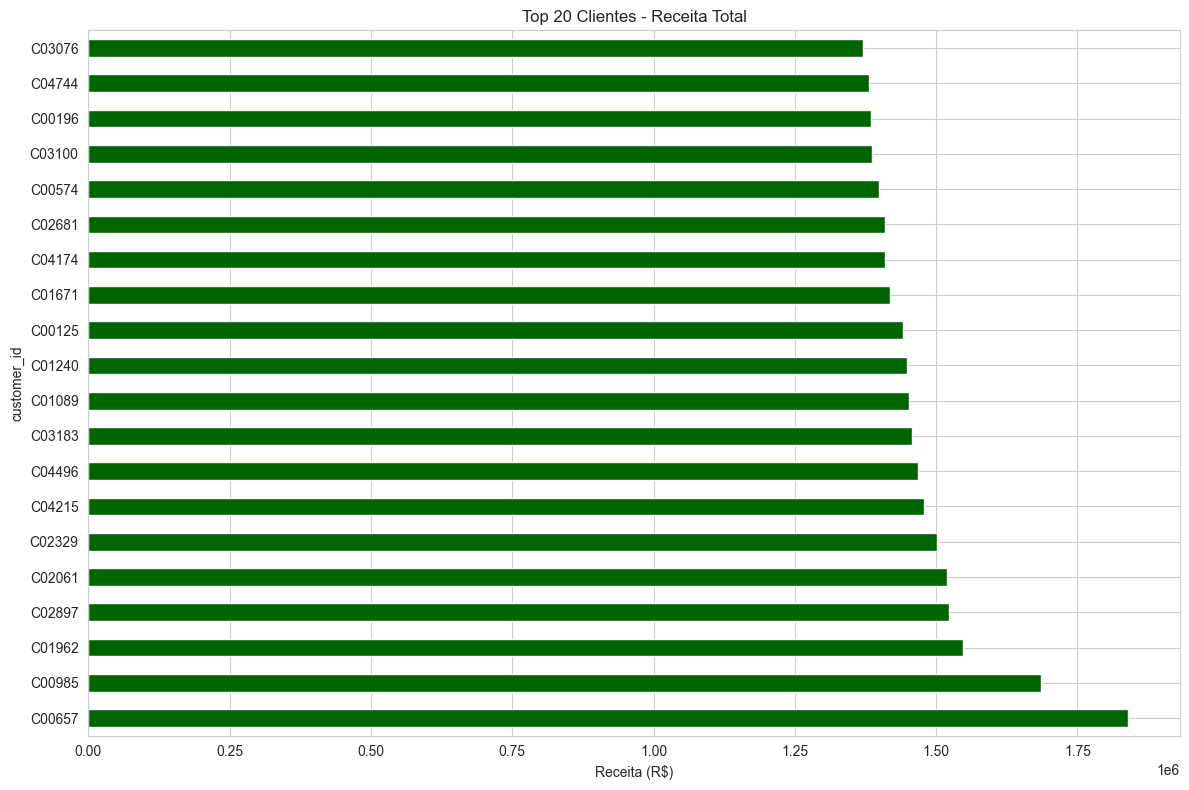

In [36]:
## ANÁLISE DE VENDAS (PARTE 1)

print("\n" + "=" * 80)
print("SEÇÃO 3: ANÁLISE DE VENDAS")
print("=" * 80)

# ===== 3.1 Série Temporal =====
print("\n3.1️ SÉRIE TEMPORAL DE VENDAS")
daily_sales = sales.groupby('sale_date')['total_price'].sum().sort_index()
print(f"Total de vendas: R$ {daily_sales.sum():,.2f}")
print(f"Média diária: R$ {daily_sales.mean():,.2f}")
print(f"Máximo diário: R$ {daily_sales.max():,.2f}")

fig, ax = plt.subplots(figsize=(14, 6))
daily_sales.plot(ax=ax, color='darkblue', linewidth=1.5)
ax.fill_between(daily_sales.index, daily_sales, alpha=0.3)
ax.set_xlabel('Data')
ax.set_ylabel('Vendas (R$)')
ax.set_title('Série Temporal: Vendas Diárias')
plt.tight_layout()
plt.show()

# ===== 3.2 Vendas por Canal =====
print("\n3.2️ TOTAL DE VENDAS POR CANAL")
channel_sales = sales.groupby('sales_channel')['total_price'].sum().sort_values(ascending=False)
print(channel_sales)

fig, ax = plt.subplots(figsize=(10, 6))
channel_sales.plot(kind='bar', ax=ax, color='mediumorchid')
ax.set_xlabel('Canal de Vendas')
ax.set_ylabel('Vendas (R$)')
ax.set_title('Total de Vendas por Canal')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# ===== 3.3 Produtos Mais Vendidos =====
print("\n3.3️ TOP 20 PRODUTOS MAIS VENDIDOS (POR QUANTIDADE)")
top_products_qty = sales.groupby('product_id').agg({
    'quantity': 'sum',
    'total_price': 'sum'
}).sort_values('quantity', ascending=False).head(20)
print(top_products_qty)

# Merge com nomes dos produtos e tratamento de arrays
top_products_names = top_products_qty.copy()
top_products_names.index = top_products_names.index.map(
    lambda x: products_ml[products_ml['product_id']==x]['product_name'].values[0] 
    if len(products_ml[products_ml['product_id']==x]) > 0 else str(x)
)

fig, ax = plt.subplots(figsize=(12, 8))
top_products_names['quantity'].plot(kind='barh', ax=ax, color='teal')
ax.set_xlabel('Quantidade Vendida')
ax.set_title('Top 20 Produtos - Quantidade Vendida')
plt.tight_layout()
plt.show()

# ===== 3.4 Clientes com Maior Volume =====
print("\n3.4️ TOP 20 CLIENTES (POR RECEITA)")
top_customers = sales.groupby('customer_id')['total_price'].sum().sort_values(ascending=False).head(20)
print(top_customers)

fig, ax = plt.subplots(figsize=(12, 8))
top_customers.plot(kind='barh', ax=ax, color='darkgreen')
ax.set_xlabel('Receita (R$)')
ax.set_title('Top 20 Clientes - Receita Total')
plt.tight_layout()
plt.show()


3.5️ TICKET MÉDIO POR CANAL
                Ticket Médio  Quantidade de Vendas
sales_channel                                     
Direct          31605.747081                 40037
Distributor     31692.026239                 40050
Representative  31835.821864                 39913


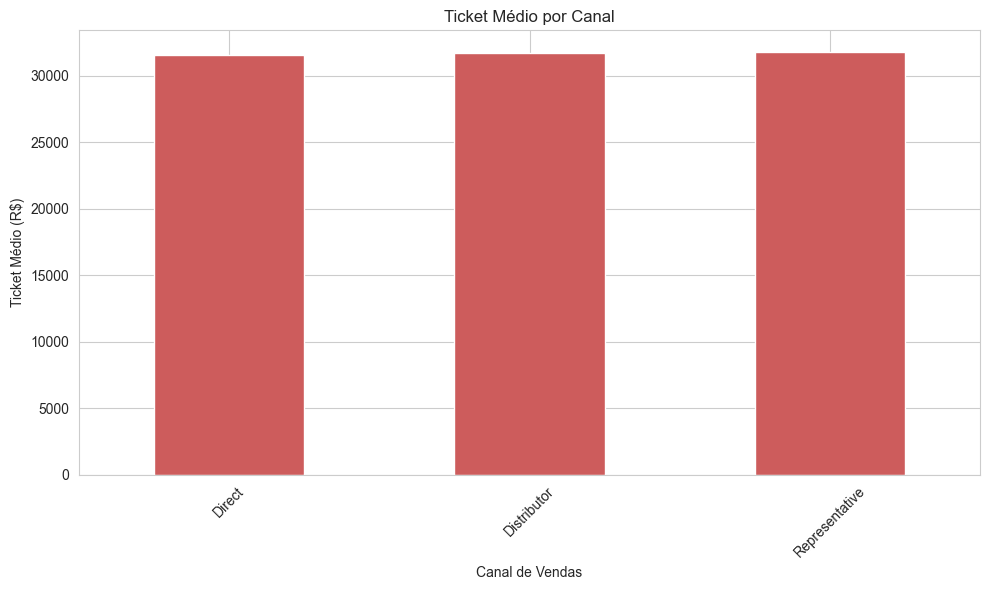


3.6️ DISTRIBUIÇÃO DE STATUS DE VENDAS
sale_status
Completed    89880
Cancelled    30120
Name: count, dtype: int64


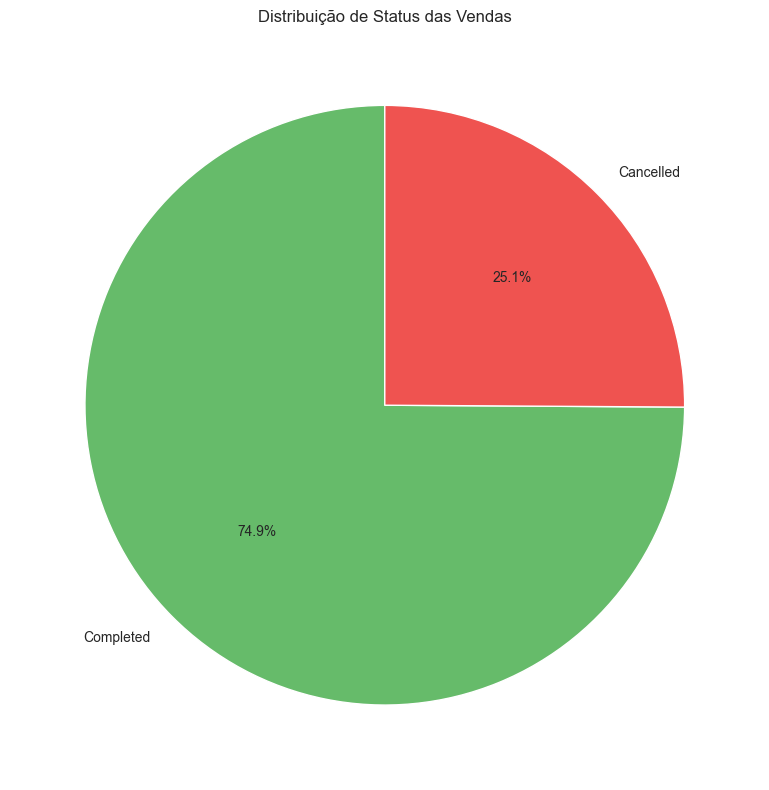


3.7️ TAXA DE CONVERSÃO POR CANAL
sales_channel
Representative    74.958034
Distributor       74.876404
Direct            74.865749
dtype: float64

Amostra de sales_status:
sale_status
Completed    89880
Cancelled    30120
Name: count, dtype: int64


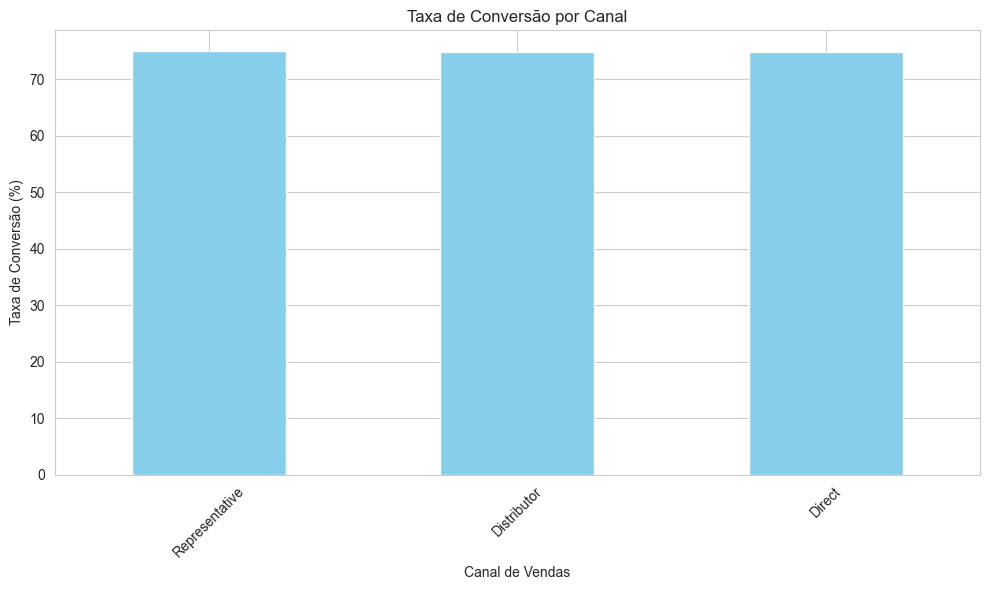


3.8️ DISTRIBUIÇÃO DE CONDIÇÕES DE PAGAMENTO
payment_terms
30 days    40124
60 days    39946
90 days    39930
Name: count, dtype: int64


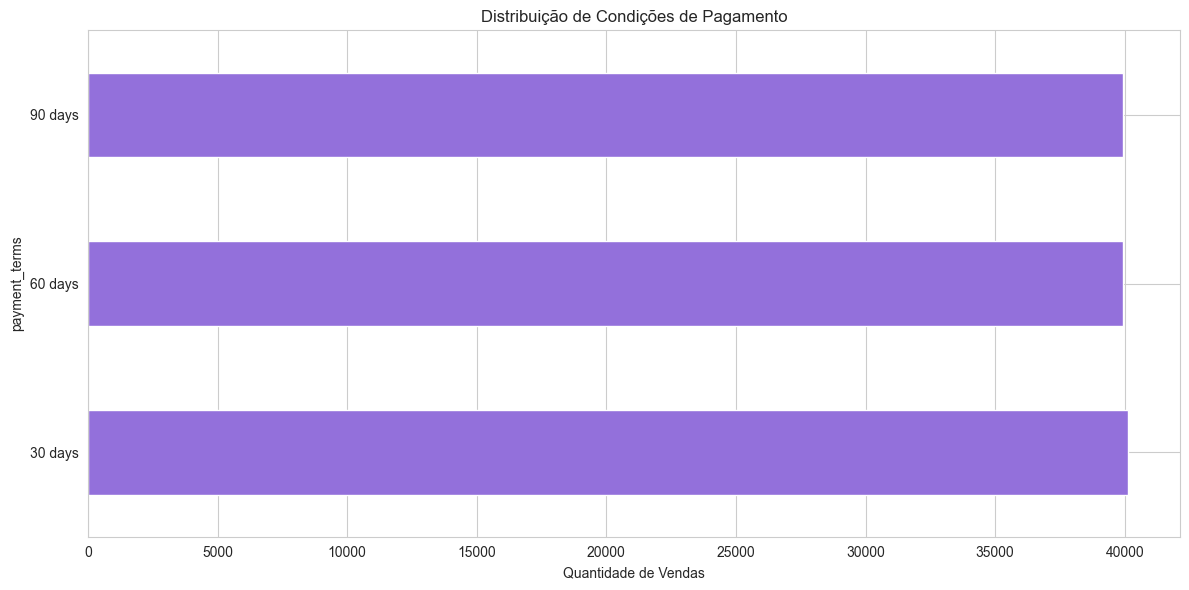

In [37]:
## ANÁLISE DE VENDAS (PARTE 2)

# ===== 3.5 Ticket Médio =====
print("\n3.5️ TICKET MÉDIO POR CANAL")
avg_ticket = sales.groupby('sales_channel')['total_price'].agg(['mean', 'count'])
avg_ticket.columns = ['Ticket Médio', 'Quantidade de Vendas']
print(avg_ticket)

fig, ax = plt.subplots(figsize=(10, 6))
avg_ticket['Ticket Médio'].plot(kind='bar', ax=ax, color='indianred')
ax.set_xlabel('Canal de Vendas')
ax.set_ylabel('Ticket Médio (R$)')
ax.set_title('Ticket Médio por Canal')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# ===== 3.6 Status de Vendas =====
print("\n3.6️ DISTRIBUIÇÃO DE STATUS DE VENDAS")
status_dist = sales['sale_status'].value_counts()
print(status_dist)

fig, ax = plt.subplots(figsize=(10, 8))
colors_status = ['#66bb6a', '#ef5350', '#ffa726']
ax.pie(status_dist, labels=status_dist.index, autopct='%1.1f%%', 
       colors=colors_status[:len(status_dist)], startangle=90)
ax.set_title('Distribuição de Status das Vendas')
plt.tight_layout()
plt.show()

# ===== 3.7 Taxa de Conversão =====
print("\n3.7️ TAXA DE CONVERSÃO POR CANAL")
completed = sales[sales['sale_status'] == 'Completed'] \
    .groupby('sales_channel').size().astype(float)

total = sales.groupby('sales_channel').size().astype(float)

conversao = (completed / total * 100).reindex(total.index, fill_value=0) \
                                   .sort_values(ascending=False)
print(conversao)


fig, ax = plt.subplots(figsize=(10, 6))
conversao.plot(kind='bar', ax=ax, color='skyblue')

ax.set_xlabel('Canal de Vendas')
ax.set_ylabel('Taxa de Conversão (%)')
ax.set_title('Taxa de Conversão por Canal')
ax.tick_params(axis='x', rotation=45)

print("\nAmostra de sales_status:")
print(sales['sale_status'].value_counts())

plt.tight_layout()
plt.show()

# ===== 3.8 Condições de Pagamento =====
print("\n3.8️ DISTRIBUIÇÃO DE CONDIÇÕES DE PAGAMENTO")
payment_dist = sales['payment_terms'].value_counts()
print(payment_dist)

fig, ax = plt.subplots(figsize=(12, 6))
payment_dist.plot(kind='barh', ax=ax, color='mediumpurple')
ax.set_xlabel('Quantidade de Vendas')
ax.set_title('Distribuição de Condições de Pagamento')
plt.tight_layout()
plt.show()


SEÇÃO 4: ANÁLISE CRUZADA (PRODUTO × CLIENTE)

4.1️ QUAL PROBLEMA CADA INDÚSTRIA PREFERE RESOLVER?
problem_type      Contaminação  Desgaste  Superaquecimento  Vibração
industry                                                            
Alimentos                 3924      3863              3852      3847
Automotiva                3730      3664              3646      3710
Cimento                   3648      3525              3444      3567
Energia                   3791      3631              3682      3664
Mineração                 3869      3795              3766      3739
Papel e Celulose          3793      3674              3632      3731
Química                   3792      3575              3647      3788
Siderurgia                4064      3952              3944      4051


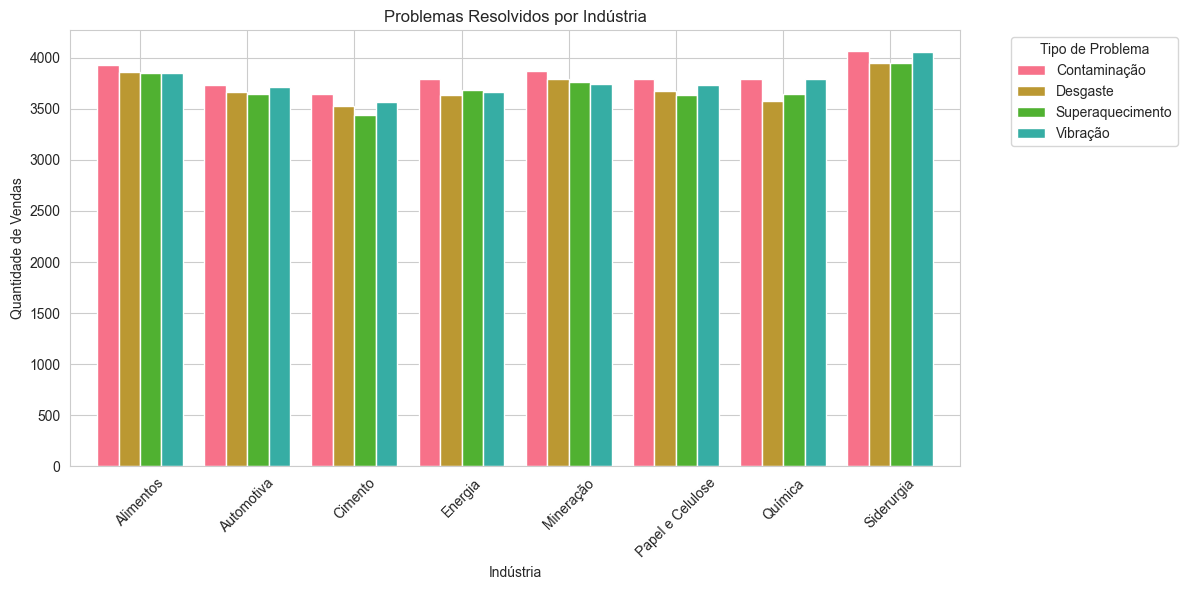


4.2️ PRODUTOS PREMIUM: PREÇO vs VOLUME DE VENDAS


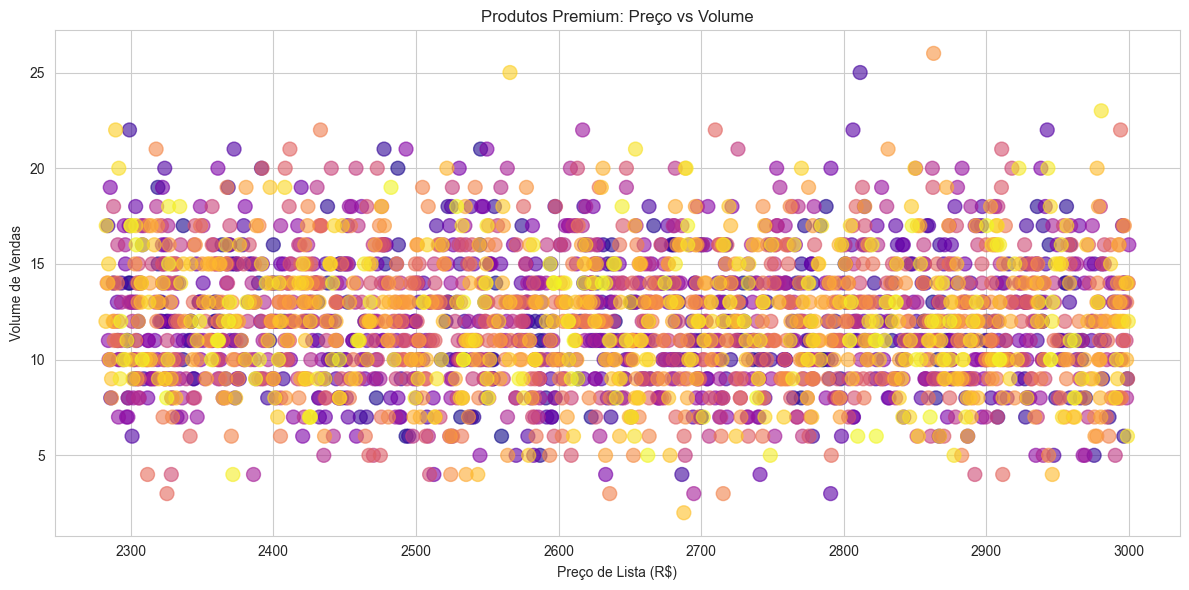


4.3️ TOP 20 PRODUTOS POR RENTABILIDADE (MARGEM TOTAL)
product_id
P05457    1576514.19
P07507    1510753.29
P06100    1469175.10
P09553    1439994.34
P04660    1323372.67
P01202    1264141.81
P09099    1257489.90
P08575    1206230.18
P03484    1189045.92
P01573    1188582.06
P03211    1188003.02
P09468    1180287.96
P09662    1178629.81
P07524    1143514.80
P04875    1138920.41
P00329    1130266.45
P03659    1126094.99
P07763    1122392.82
P04362    1114730.53
P06008    1104740.64
Name: margin, dtype: float64


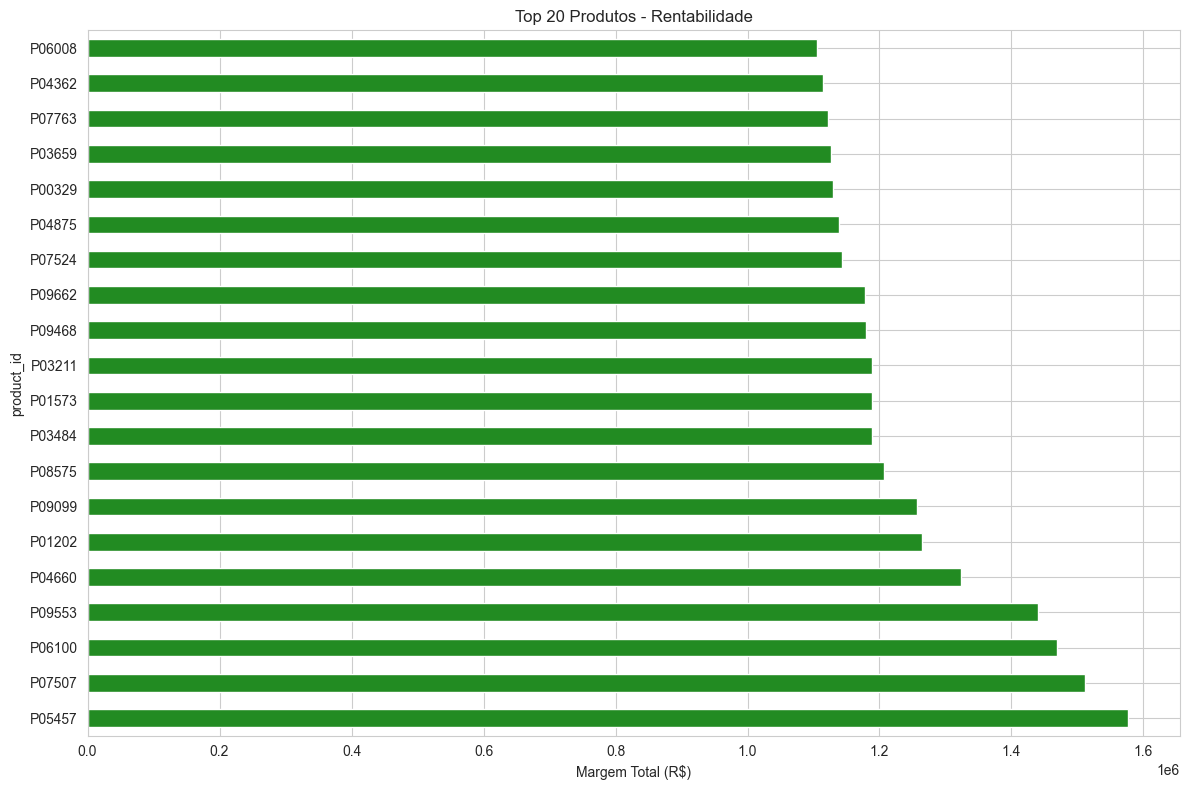


4.4️ MATRIZ: QUAL PRODUTO RESOLVE QUAL PROBLEMA?
Colunas usadas na matriz: ['problem_Contaminação', 'problem_Desgaste', 'problem_Superaquecimento', 'problem_Vibração']
problem_Contaminação        int64
problem_Desgaste            int64
problem_Superaquecimento    int64
problem_Vibração            int64
dtype: object


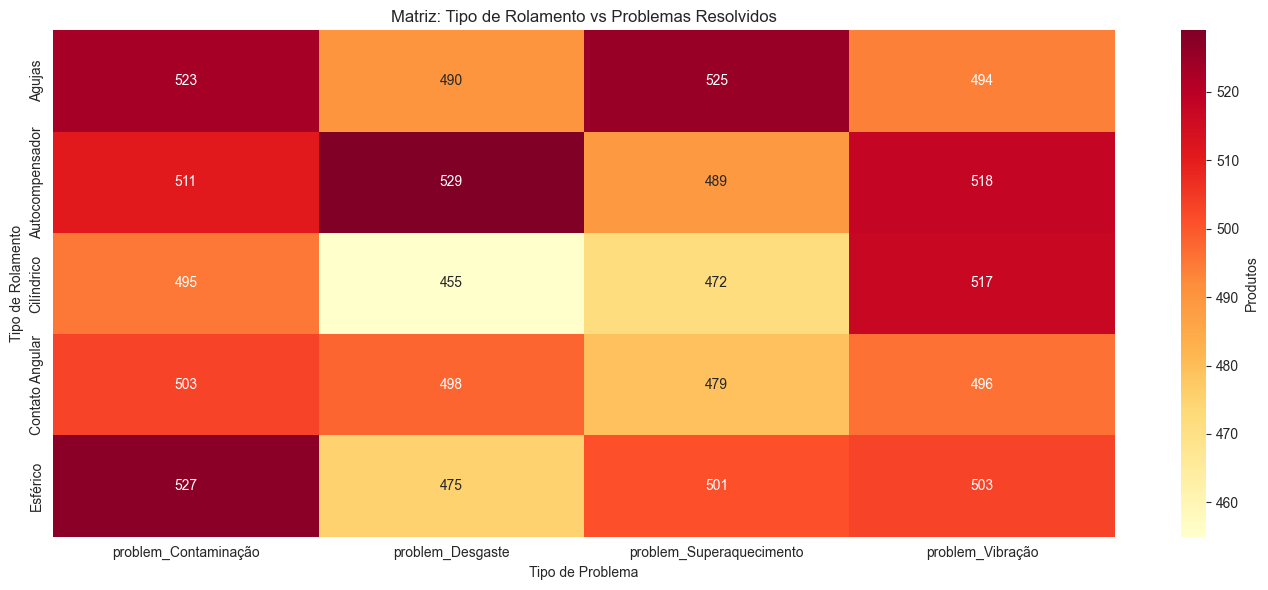

In [38]:
## ANÁLISE CRUZADA

print("\n" + "=" * 80)
print("SEÇÃO 4: ANÁLISE CRUZADA (PRODUTO × CLIENTE)")
print("=" * 80)

# ===== 4.1 Problemas por Indústria =====
print("\n4.1️ QUAL PROBLEMA CADA INDÚSTRIA PREFERE RESOLVER?")

sales_enriched = sales.merge(
    customers_ml[['customer_id', 'industry']], 
    on='customer_id', 
    how='left'
)

problem_cols_prod = [c for c in products_ml.columns if c.startswith('problem_')]
products_problems = products_ml[['product_id'] + problem_cols_prod].copy()

def get_problem_type(row):
    problems = [col.replace('problem_', '') for col in problem_cols_prod if row[col] == 1]
    return ', '.join(problems) if problems else 'Uso Geral'

products_problems['problem_type'] = products_problems.apply(get_problem_type, axis=1)

sales_enriched = sales_enriched.merge(
    products_problems[['product_id', 'problem_type']], 
    on='product_id',
    how='left'
)

industry_problem = sales_enriched.groupby(['industry', 'problem_type']).size().unstack(fill_value=0)
print(industry_problem)

fig, ax = plt.subplots(figsize=(12, 6))
industry_problem.plot(kind='bar', ax=ax, width=0.8)
ax.set_xlabel('Indústria')
ax.set_ylabel('Quantidade de Vendas')
ax.set_title('Problemas Resolvidos por Indústria')
ax.legend(title='Tipo de Problema', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# ===== 4.2 Produtos de Alto Custo vs Volume =====
print("\n4.2️ PRODUTOS PREMIUM: PREÇO vs VOLUME DE VENDAS")

high_cost_products = products_ml[products_ml['list_price'] > products_ml['list_price'].quantile(0.75)]
high_cost_sales_vol = sales[sales['product_id'].isin(high_cost_products['product_id'])].groupby('product_id').size()

high_cost_prices = products_ml[products_ml['product_id'].isin(high_cost_sales_vol.index)].set_index('product_id')['list_price']

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(high_cost_prices, high_cost_sales_vol, s=100, alpha=0.6, c=range(len(high_cost_prices)), cmap='plasma')
ax.set_xlabel('Preço de Lista (R$)')
ax.set_ylabel('Volume de Vendas')
ax.set_title('Produtos Premium: Preço vs Volume')
plt.tight_layout()
plt.show()

# ===== 4.3 Rentabilidade por Produto =====
print("\n4.3️ TOP 20 PRODUTOS POR RENTABILIDADE (MARGEM TOTAL)")

sales_with_cost = sales.merge(
    products_ml[['product_id', 'unit_cost', 'list_price']], 
    on='product_id',
    how='left'
)
sales_with_cost['margin'] = (sales_with_cost['total_price'] - 
                             (sales_with_cost['quantity'] * sales_with_cost['unit_cost']))
product_profitability = sales_with_cost.groupby('product_id')['margin'].sum().sort_values(ascending=False).head(20)
print(product_profitability)

fig, ax = plt.subplots(figsize=(12, 8))
product_profitability.plot(kind='barh', ax=ax, color='forestgreen')
ax.set_xlabel('Margem Total (R$)')
ax.set_title('Top 20 Produtos - Rentabilidade')
plt.tight_layout()
plt.show()


# ===== 4.4 Matriz Produto-Problema =====
print("\n4.4️ MATRIZ: QUAL PRODUTO RESOLVE QUAL PROBLEMA?")

# pegue só as colunas realmente binárias (0/1)
problem_cols_prod = [
    c for c in products_ml.columns
    if c.startswith("problem_") and products_ml[c].dtype != "object"
]

print("Colunas usadas na matriz:", problem_cols_prod)

# matriz numérica: soma das flags por tipo de rolamento
product_bearing_problem = (
    products_ml
    .groupby("bearing_type")[problem_cols_prod]
    .sum()
)
print(product_bearing_problem.dtypes)  # deve ser tudo int ou float

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(
    product_bearing_problem,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    ax=ax,
    cbar_kws={"label": "Produtos"}
)
ax.set_title("Matriz: Tipo de Rolamento vs Problemas Resolvidos")
ax.set_xlabel("Tipo de Problema")
ax.set_ylabel("Tipo de Rolamento")
plt.tight_layout()
plt.show()


In [39]:
## INSIGHTS & RECOMENDAÇÕES

print("\n" + "=" * 80)
print("SEÇÃO 5: INSIGHTS E RECOMENDAÇÕES")
print("=" * 80)

# ===== INSIGHT 1: Produtos com baixa performance =====
print("\n INSIGHT 1: PRODUTOS COM BAIXA PERFORMANCE")
low_performance = sales.groupby('product_id').size().sort_values().head(10)
print(f"\n{len(low_performance)} produtos com as menores vendas:")
for prod_id, qty in low_performance.items():
    prod_name_arr = products_ml[products_ml['product_id']==prod_id]['product_name'].values
    prod_name = prod_name_arr[0] if len(prod_name_arr) > 0 else str(prod_id)
    print(f"  - {prod_name}: {qty} vendas")

# ===== INSIGHT 2: Clientes com alto potencial =====
print("\n INSIGHT 2: CLIENTES COM MAIOR POTENCIAL")
high_value = sales.groupby('customer_id')['total_price'].sum().sort_values(ascending=False).head(10)
print(f"\nTop 10 clientes (receita):")
for cust_id, revenue in high_value.items():
    cust_name_arr = customers_ml[customers_ml['customer_id']==cust_id]['company_name'].values
    cust_name = cust_name_arr[0] if len(cust_name_arr) > 0 else str(cust_id)
    print(f"  - {cust_name}: R$ {revenue:,.2f}")

# ===== INSIGHT 3: Indústrias mais lucrativas =====
print("\n INSIGHT 3: INDÚSTRIAS MAIS LUCRATIVAS")
industry_revenue = sales_enriched.groupby('industry')['total_price'].sum().sort_values(ascending=False)
print(f"\nReceita por indústria:")
for ind, rev in industry_revenue.items():
    pct = rev / industry_revenue.sum() * 100
    print(f"  - {ind}: R$ {rev:,.2f} ({pct:.1f}%)")

# ===== INSIGHT 4: Canal mais efetivo =====
print("\n INSIGHT 4: CANAL DE VENDAS MAIS EFETIVO")
channel_effectiveness = sales.groupby('sales_channel').agg({
    'total_price': 'sum',
    'sale_date': 'count'
}).sort_values('total_price', ascending=False)
channel_effectiveness.columns = ['Receita Total', 'Quantidade de Vendas']
channel_effectiveness['Ticket Médio'] = (
    channel_effectiveness['Receita Total'] / channel_effectiveness['Quantidade de Vendas']
)
print(channel_effectiveness)

# ===== INSIGHT 5: Oportunidades de Cross-sell =====
print("\n INSIGHT 5: OPORTUNIDADES DE CROSS-SELL")
print("\nClientes que compram Vibração também compram:")
customers_vib = sales_enriched[sales_enriched['problem_type'].str.contains('Vibração', na=False)]['customer_id'].unique()
other_problems = sales_enriched[sales_enriched['customer_id'].isin(customers_vib)]['problem_type'].value_counts()
print(other_problems)

# ===== INSIGHT 6: Segmentação de Clientes =====
print("\n INSIGHT 6: SEGMENTAÇÃO DE CLIENTES POR VALOR")

# Usar RFM simplificado
customer_value = sales.groupby('customer_id').agg({
    'total_price': 'sum',
    'sale_date': 'count'   
}).reset_index()
customer_value.columns = ['customer_id', 'monetary', 'frequency']

# Classificar
customer_value['segment'] = pd.cut(
    customer_value['monetary'], 
    bins=3, 
    labels=['Baixo Valor', 'Médio Valor', 'Alto Valor']
)

segment_dist = customer_value['segment'].value_counts()
print(f"\nDistribuição de clientes por segmento:")
print(segment_dist)

# Merge com dados de cliente
customer_value_enriched = customer_value.merge(
    customers_ml[['customer_id', 'industry', 'maintenance_budget_annual']], 
    on='customer_id'
)

for segment in ['Alto Valor', 'Médio Valor', 'Baixo Valor']:
    segment_data = customer_value_enriched[customer_value_enriched['segment']==segment]
    if len(segment_data) > 0:
        industry_mode = segment_data['industry'].mode()
        industry_value = industry_mode[0] if len(industry_mode) > 0 else 'N/A'
        
        print(f"\n{segment}:")
        print(f"  - Quantidade: {len(segment_data)}")
        print(f"  - Receita média: R$ {segment_data['monetary'].mean():,.2f}")
        print(f"  - Indústria mais comum: {industry_value}")
        print(f"  - Orçamento médio: R$ {segment_data['maintenance_budget_annual'].mean():,.2f}")


SEÇÃO 5: INSIGHTS E RECOMENDAÇÕES

 INSIGHT 1: PRODUTOS COM BAIXA PERFORMANCE

10 produtos com as menores vendas:
  - Rolamento Industrial 8684: 2 vendas
  - Rolamento Industrial 2660: 2 vendas
  - Rolamento Industrial 4535: 2 vendas
  - Rolamento Industrial 1783: 2 vendas
  - Rolamento Industrial 6164: 3 vendas
  - Rolamento Industrial 4027: 3 vendas
  - Rolamento Industrial 7993: 3 vendas
  - Rolamento Industrial 725: 3 vendas
  - Rolamento Industrial 3279: 3 vendas
  - Rolamento Industrial 1805: 3 vendas

 INSIGHT 2: CLIENTES COM MAIOR POTENCIAL

Top 10 clientes (receita):
  - Empresa Industrial 657: R$ 1,839,521.09
  - Empresa Industrial 985: R$ 1,685,415.66
  - Empresa Industrial 1962: R$ 1,546,904.03
  - Empresa Industrial 2897: R$ 1,522,470.27
  - Empresa Industrial 2061: R$ 1,518,842.73
  - Empresa Industrial 2329: R$ 1,502,106.67
  - Empresa Industrial 4215: R$ 1,477,929.05
  - Empresa Industrial 4496: R$ 1,468,804.02
  - Empresa Industrial 3183: R$ 1,456,807.46
  - Empresa I

In [40]:
## RESUMO FINAL

print("\n" + "=" * 80)
print("RESUMO")
print("=" * 80)

# Taxa de conclusão calculada corretamente
total_sales = len(sales)
completed_sales = len(sales[sales['sale_status']=='Concluída'])
completion_rate = (completed_sales / total_sales * 100) if total_sales > 0 else 0

print(f"""
╔════════════════════════════════════════════════════════════════════════════╗
║ ESTATÍSTICAS GERAIS DO PROJETO                                             ║
╠════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║ PRODUTOS:                                                                    ║
║   • Total de produtos: {len(products_ml):,}                                    ║
║   • Tipos de rolamentos: {products_ml['bearing_type'].nunique()}                         ║
║   • Materiais: {products_ml['material'].nunique()}                               ║
║   • Preço médio: R$ {products_ml['list_price'].mean():,.2f}                       ║
║   • Margem média: {products_ml['profit_margin'].mean():.1f}%                        ║
║                                                                              ║
║ CLIENTES:                                                                    ║
║   • Total de clientes: {len(customers_ml):,}                                    ║
║   • Indústrias: {customers_ml['industry'].nunique()}                               ║
║   • Receita média estimada: R$ {customers_ml['annual_revenue_estimated'].mean():,.0f}              ║
║   • Orçamento médio de manutenção: R$ {customers_ml['maintenance_budget_annual'].mean():,.2f}   ║
║                                                                              ║
║ VENDAS:                                                                      ║
║   • Total de transações: {total_sales:,}                                   ║
║   • Receita total: R$ {sales['total_price'].sum():,.2f}                      ║
║   • Receita média por transação: R$ {sales['total_price'].mean():,.2f}             ║
║   • Período: {sales['sale_date'].min().date()} a {sales['sale_date'].max().date()}               ║
║   • Taxa de conclusão: {completion_rate:.1f}%                               ║
║                                                                              ║
╚════════════════════════════════════════════════════════════════════════════╝
""")

print("\nANÁLISE EXPLORATÓRIA CONCLUÍDA!")




RESUMO

╔════════════════════════════════════════════════════════════════════════════╗
║ ESTATÍSTICAS GERAIS DO PROJETO                                             ║
╠════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║ PRODUTOS:                                                                    ║
║   • Total de produtos: 10,000                                    ║
║   • Tipos de rolamentos: 5                         ║
║   • Materiais: 3                               ║
║   • Preço médio: R$ 1,592.05                       ║
║   • Margem média: 720.0%                        ║
║                                                                              ║
║ CLIENTES:                                                                    ║
║   • Total de clientes: 5,000                                    ║
║   • Indústrias: 8                               ║
║   • Receita média estimada

| Linha / Bloco        | Erro original (resumo)                                                                 | Correção aplicada / recomendada                                                                                          |
|----------------------|----------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| 1.4 Boxplot          | `bp['boxes'].set_facecolor()` em um único objeto retornava AttributeError             | Iterar sobre as boxes: `for box in bp['boxes']: box.set_facecolor(...)`                                                 |
| 2.7 Scatter          | Colorbar chamada sem referência explícita ao scatter (`plt.colorbar()` genérico)      | Usar `plt.colorbar(scatter)` onde `scatter` é o retorno de `plt.scatter`                                                |
| 3.3 Top produtos     | Array retornado sem extração de valor único ao buscar nome do produto                 | `name_arr = products_ml[...]['product_name'].values; name = name_arr[0] if len(name_arr) > 0 else str(product_id)`      |
| 3.6 Status vendas    | Taxa de conclusão geral calculada com contagem incorreta                              | `totalsales = len(sales); completedsales = len(sales[sales['sale_status']=='Completed']); completionrate = completedsales / totalsales * 100 if totalsales > 0 else 0` |
| 3.7 Taxa por canal   | Filtro usando `sale_status == 'Concluída'` (não existe) gerando `NaN`                 | `completed = sales[sales['sale_status']=='Completed'].groupby('sales_channel').size().astype(float); total = sales.groupby('sales_channel').size().astype(float); conversao = (completed / total * 100).reindex(total.index, fill_value=0)` |
| 3.7 Gráfico vazio    | Valores de conversão muito pequenos e eixo Y colado em zero                           | Após o plot: `ax.set_ylim(min(0, conversao.min()-1), conversao.max()+1)`                                                |
| 4.1 Problemas prod.  | Uso da coluna inexistente `problem_type`                                              | Trabalhar apenas com colunas binárias `problem_...` e, quando precisar de texto, mapear as flags para rótulos          |
| 4.4 Matriz prod‑prob | `pd.crosstab(products_ml['bearing_type'], [problem_cols_prod])` com erro de tamanho   | Remover `crosstab` e usar: `product_bearing_problem = products_ml.groupby('bearing_type')[problem_cols_prod].sum()`     |
| 4.4 Heatmap          | `sns.heatmap` falhando com “could not convert string to float” (mistura texto/número) | Definir apenas colunas numéricas: `problem_cols_prod = [c for c in products_ml.columns if c.startswith('problem_') and products_ml[c].dtype != 'object']; product_bearing_problem = products_ml.groupby('bearing_type')[problem_cols_prod].sum()` |
| Insight 1 & 2        | Arrays (nomes, indústrias etc.) usadas diretamente em prints                          | Converter para string única: `arr = df[...].values; val = arr[0] if len(arr) > 0 else 'NA'`                             |
| Insight 3            | Percentual por indústria calculado sem normalizar pelo total                           | `pct = rev / industry_revenue.sum() * 100`                                                                               |
| Insight 4            | Métricas de canal em `groupby` sem renomear colunas claramente                        | Após `agg`: `df.columns = ['Receita Total', 'Quantidade de Vendas']; df['Ticket Medio'] = df['Receita Total'] / df['Quantidade de Vendas']` |
| Insight 5            | Uso direto de `problem_type` textual sem garantir existência / `str.contains` sem `na` | `sales_enriched['problem_type'].str.contains('Vibração', na=False)` ou derivar problemas a partir das colunas `problem_...` |
| Insight 6            | `.mode()` retorna Series; uso direto quebrava quando vazio                            | `m = segment_data['industry'].mode(); industry_value = m[0] if len(m) > 0 else 'NA'`                                     |
| Resumo final         | Taxa de conclusão calculada com base incorreta                                        | Mesmo padrão da linha 3.6: usar `len()` explícito e proteger divisão por zero                                            |
| Tabela de correções  | Tabela colada em célula de código com `→`, aspas curvas etc. gerando `SyntaxError`    | Manter a tabela em célula markdown; em Python usar apenas comentários ASCII simples, sem símbolos especiais             |




Gerado com Perplexity e ChatGPT